## Makine Öğrenmesi Dersleri-2

İlk dersimizde Python’ın pandas, matplotlib ve seaborn kütüphanelerindeki temel fonksiyonlar ile veri analizi yapmıştık.

Bu derste ise hava yollarındaki gecikmelerle ile ilgili veri setini analiz ederken çalışmamızın temelinde görselleştirme olacak. Günlük hayatta işime yarayan görselleştirme fonksiyonlarından bazılarını bu yazıda kullandım. Bunlara ek olarak kullandığınız ve eklemek istediğiniz fonksiyonlar varsa yazıyı daha da zenginleştirebiliriz.

Ders başlıkları şöyle:

- Box-plot
- Pie-chart
- Count-plot
- Strip-plot
- Histogram
- Dist-plot
- Kde-plot
- Reg-plot
- Scatter-plot

Bu ders için ajandamız çok yoğun olduğundan size analizlerinizde faydalı olacak birçok görselleştirme aracını tanıtmaya çalışacağım ama tek tek açıklama yaparsam yazı çok uzayacağı için kısa tuttum varsa sorularınızı bekliyorum.

İlk derste olduğu gibi bu dersi takip etmek için de bilgisayarınıza Python kurmanıza veya veri setini indirmenize gerek yok. İhtiyacınız olan tek şey internet ve bu yazıyı okuduğunuza göre o konuda da bir sorunumuz yok. İzlemeniz gereken adımlar sırasıyla şöyle:
- Google hesabınızı açın.
- https://colab.research.google.com/ adresine gidin.
- NEW PYTHON 3 NOTEBOOK'a tıklayın.
- Oradaki satıra aşağıdaki kodu yapıştırın ve play tuşuna basın.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Python_Dersleri/master/python_dersleri_1/data/flight.csv')
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00


In [0]:
Yukarıdaki gibi bir sonuç çıkmış olmalı. Şimdi kütüphanelerimizi çağıralım.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

Veri setimizi tarihe göre zenginleştirelim.
- Veri tipini pd.to_datetime() fonksiyonuyla değiştiriyoruz. 
- Sonrasında aya, haftaya, saate ve haftanın gününe göre verimizi zenginleştirip kontrol ediyoruz.

In [3]:
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['month'] = df['time_hour'].dt.month
df['day'] = df['time_hour'].dt.day
df['hour'] = df['time_hour'].dt.hour
df['day_of_week'] = df['time_hour'].dt.dayofweek
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour,month,day,hour,day_of_week
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00,1,1,5,1
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00,1,1,5,1
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00,1,1,5,1
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00,1,1,5,1
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00,1,1,6,1


### Box-plot

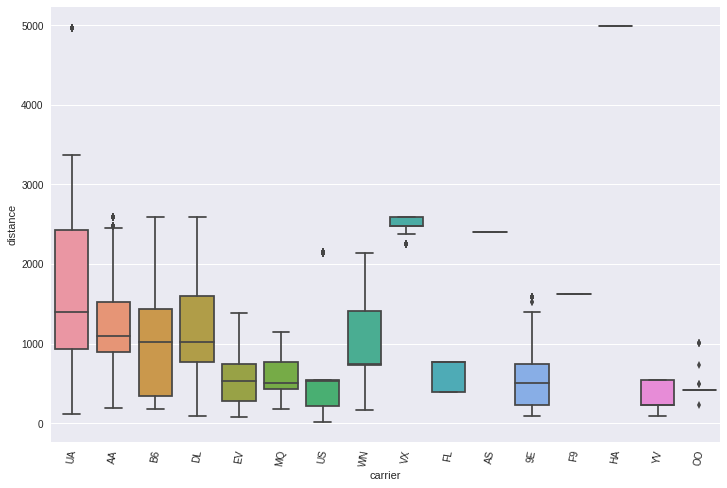

In [5]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "carrier", y = "distance", data= df)
plt.xticks(rotation=80)
plt.show()

### Pie Chart

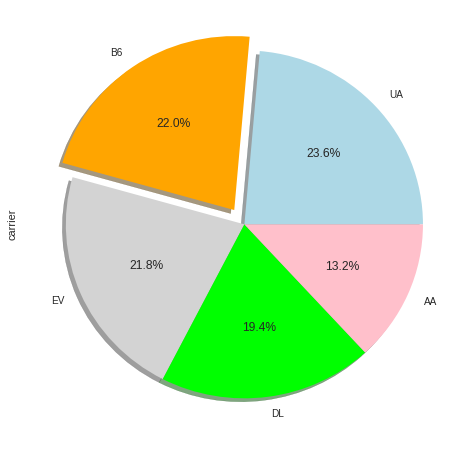

In [29]:
plt.figure(figsize=(8,8))
explode = (0, 0.1,0,0,0)
colors=['lightblue','orange','lightgrey', 'lime', 'pink']

df.carrier.value_counts()[df.carrier.value_counts()>30000].plot.pie(autopct='%1.1f%%', shadow=True, 
                                 explode = explode,colors=colors)
plt.show()

### Count-plot

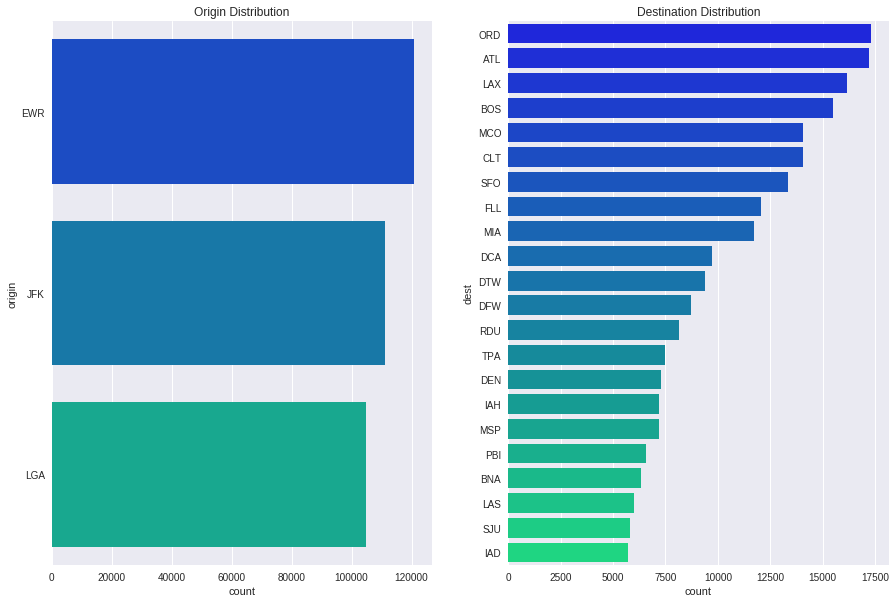

In [34]:
f,ax=plt.subplots(1,2,figsize=(15,10))

sns.countplot(y=df.origin, order= df.origin.value_counts().index,
     ax=ax[0], palette = 'winter')
ax[0].set_title('Origin Distribution')

sns.countplot(y=df.dest, order=  df.dest.value_counts()[df.dest.value_counts()>5000].index,
      ax=ax[1], palette = 'winter')
ax[1].set_title('Destination Distribution')
  
plt.show()

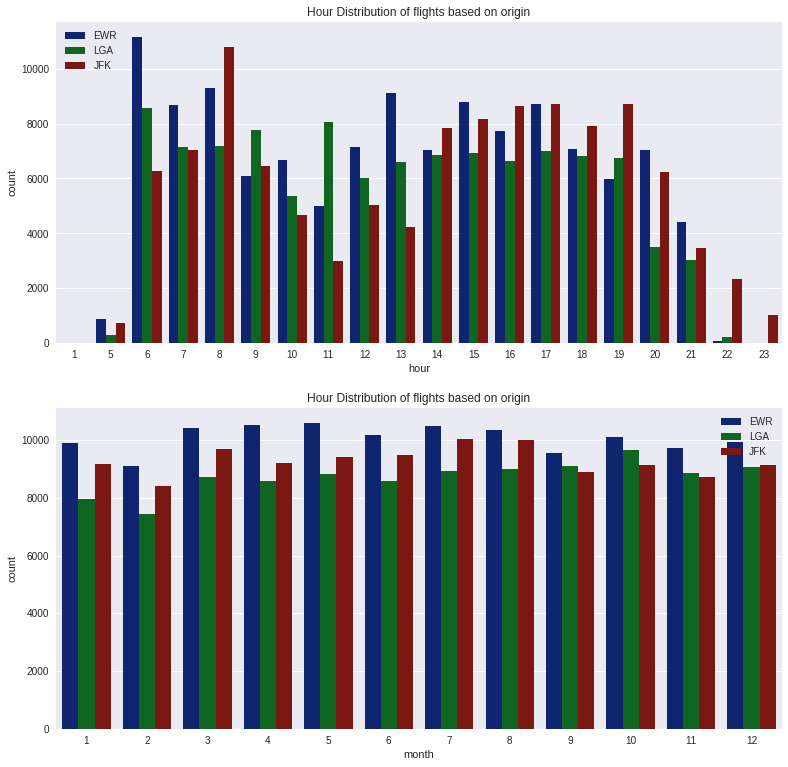

In [9]:
f,ax=plt.subplots(2,1,figsize=(13,13))
sns.set()

ax[0].set_title('Hour Distribution of flights based on origin')
sns.countplot(x='hour', hue = 'origin', data=df, ax = ax[0], 
                                                              palette = 'dark')
ax[0].legend(loc='upper left')

ax[1].set_title('Hour Distribution of flights based on origin')

sns.countplot(x='month', hue = 'origin', data=df, ax = ax[1], 
                                                                  palette = 'dark')
ax[1].legend(loc='Month Distributions of flights based on origin')
plt.subplots_adjust(hspace=0.2)
plt.show()

### Strip-plot

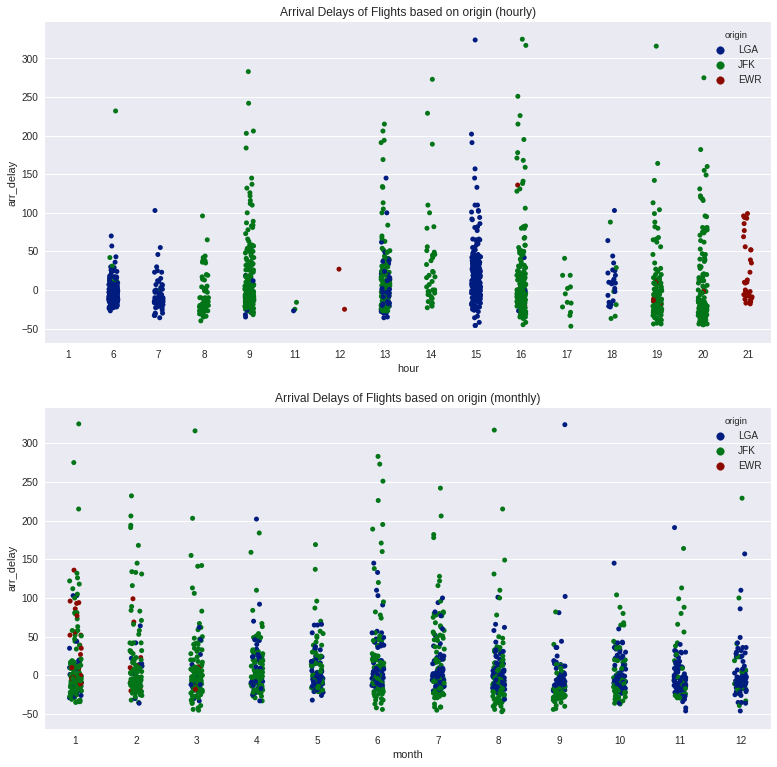

In [14]:
f,ax=plt.subplots(2,1,figsize=(13,13))
sns.set()

df1 = df[(df.distance<100)]

ax[0].set_title('Arrival Delays of Flights based on origin (hourly)')
sns.stripplot(x='hour', y='arr_delay', hue = 'origin', data=df1, ax = ax[0], 
                                                        jitter=True,  palette = 'dark')

ax[1].set_title('Arrival Delays of Flights based on origin (monthly)')

sns.stripplot(x='month', y = 'arr_delay', hue = 'origin', data=df1, ax = ax[1], 
                                                          jitter=True, palette = 'dark')

plt.subplots_adjust(hspace=0.2)
plt.show()

### Histogram

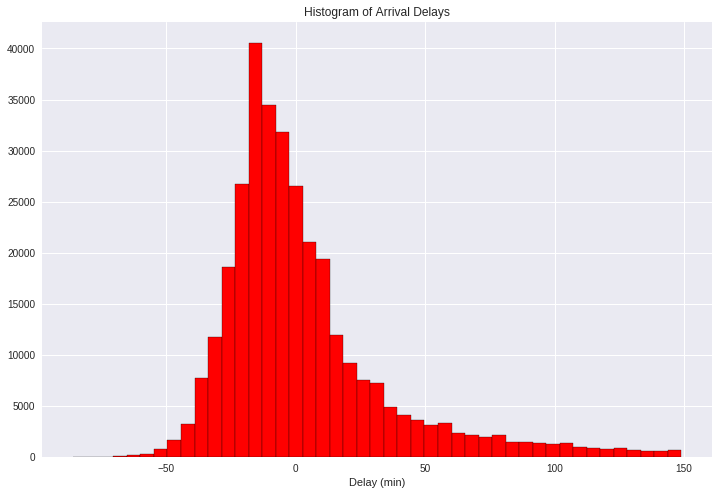

In [37]:
plt.figure(figsize=(12,8))
df1 = df[df.arr_delay < 150]
plt.hist(df1.arr_delay, bins = int(180/4), edgecolor='black', color = 'red')
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.show()

### Distplot

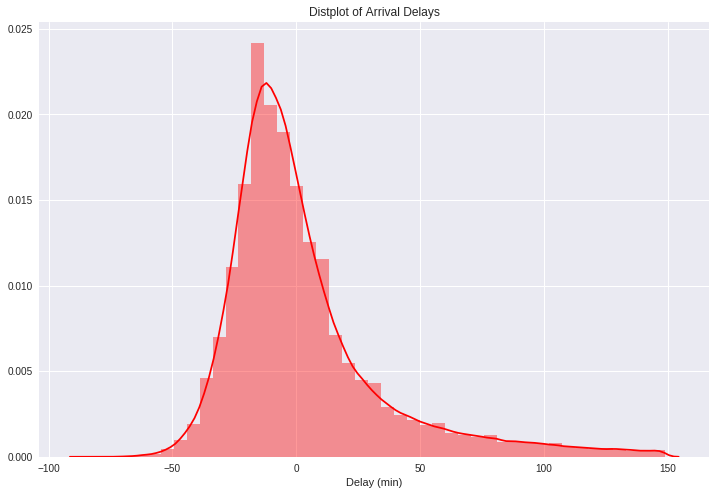

In [41]:
plt.figure(figsize=(12,8))
sns.distplot(df1['arr_delay'], bins=int(180/4), color = 'r')
plt.title('Distplot of Arrival Delays')
plt.xlabel('Delay (min)')
plt.show()

### Kde-plot

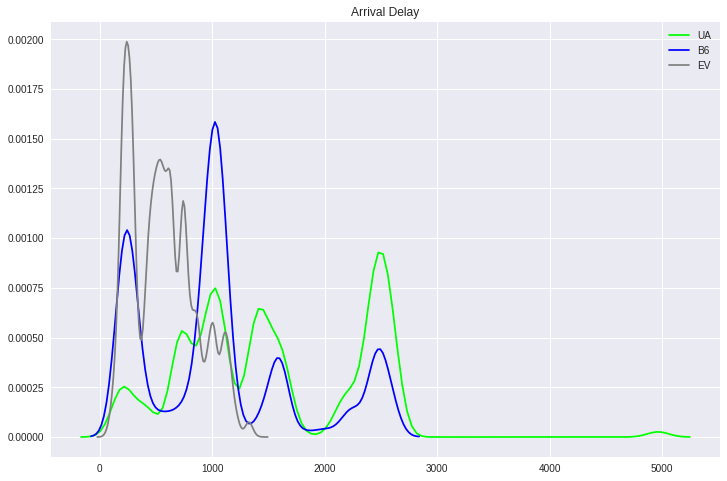

In [42]:
plt.figure(figsize=(12,8))
sns.kdeplot(df[(df.carrier=='UA')].distance,color = 'lime',label = 'UA')
sns.kdeplot(df[(df.carrier=='B6')].distance, color = 'blue',label = 'B6')
sns.kdeplot(df[(df.carrier=='EV')].distance,color = 'grey',label = 'EV')
plt.title("Arrival Delay")
plt.show()

### Scatter-plot

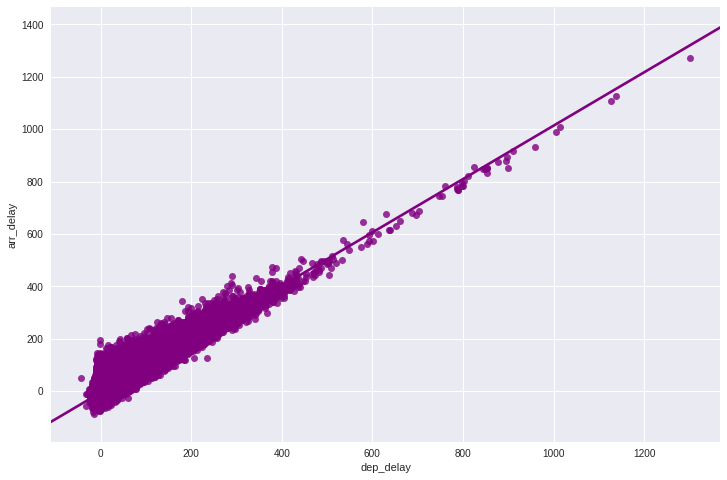

In [43]:
plt.figure(figsize=(12,8))
sns.regplot(x=df["dep_delay"], y=df["arr_delay"], color = 'purple')
plt.show()

Bu haftaki ders geçen haftanın devamı niteliğinde olduğu için bazı yapıları bildiğinizi varsaydım, eğer anlamadığınız veya açık olmadığını düşündüğünüz bir yer varsa öncelikle ilk derse bakmanızı öneririm. 

Geçen haftaki yazımda söylediğim gibi Python kodlarını buradan indirip üzerinde çalışmanız, yazdığım değerleri değiştirmeniz ve bol bol hata almanız en iyi öğrenme yöntemi.

Veri bilimiyle veya herhangi bir konu ile ilgili (sadece) yazılar okumak, videolar izlemek sınavdan önce cevapları olan arşiv sorularına bakmaya benzer. Arşivde kolay gözüken soruların benzerleri sınavda geldiği halde yapamayan insanlardan olmamanız ve ilk hatanızı iş görüşmesinde yapmamanız dileğiyle.

## The purpose of visualization is insight, not pictures.
―Ben Shneiderman